In [20]:
from ay_torch import *
%matplotlib inline

## fastai's data augmentation

In [82]:
import fastai.vision.all
path= fastai.vision.all.untar_data(fastai.vision.all.URLs.CIFAR)
dblock= fastai.vision.all.DataBlock(blocks=(fastai.vision.all.ImageBlock(), fastai.vision.all.CategoryBlock()),
                                    get_items=fastai.vision.all.get_image_files,
                                    get_y=fastai.vision.all.parent_label,
                                    item_tfms=fastai.vision.all.Resize(460),
                                    batch_tfms=fastai.vision.all.aug_transforms(size=224, min_scale=0.75) )
# dblock= fastai.vision.all.DataBlock(blocks=(fastai.vision.all.ImageBlock(), fastai.vision.all.CategoryBlock()),
#                                     get_items=fastai.vision.all.get_image_files,
#                                     get_y=fastai.vision.all.parent_label )
dls= dblock.dataloaders(path, bs=64)
dl_train,dl_test= dls.train, dls.valid
dset_train,dset_test= dls.train_ds, dls.valid_ds
dset_train.classes,dset_test.classes= dl_train.vocab,dl_test.vocab

Data proc time: 0.06567271426320076


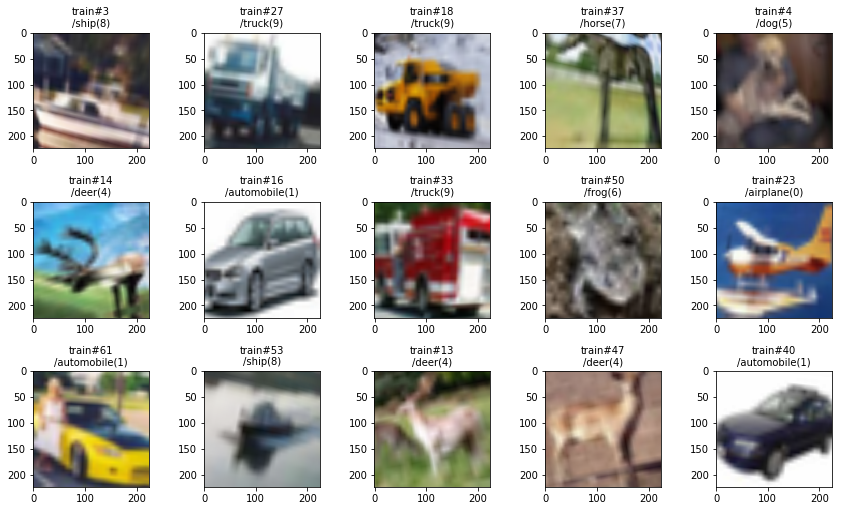

In [85]:
t0= time.time()
b= dl_train.one_batch()
print(f'Data proc time: {(time.time()-t0)/len(b[0])*15}')
idxes= np.random.permutation(len(b[0]))[:15]
imgs= [b[0][i].cpu() for i in idxes]
labels= [f'train#{i}\n/{dl_train.vocab[b[1][i]]}({b[1][i]})' for i in idxes]
PlotImgGrid(imgs, labels)

# Testing data augmentation for CIFAR-10

In [134]:
def GetDataTransforms(mode, ver=3):
  if mode=='train':
    if ver==1:
      return torchvision.transforms.Compose([
          # torchvision.transforms.Resize(224),
          torchvision.transforms.Resize(460),
          # torchvision.transforms.Resize(256),
          # torchvision.transforms.RandomAffine(degrees=(-10, 10), scale=(0.75, 1.1)),
          torchvision.transforms.RandomRotation(degrees=10),
          torchvision.transforms.RandomHorizontalFlip(),
          torchvision.transforms.RandomResizedCrop(224, scale=(0.6, 0.75)),
          # torchvision.transforms.ColorJitter(brightness=0.2, contrast=0, saturation=0, hue=0),
          torchvision.transforms.ToTensor(),
          #torchvision.transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
        ])
    elif ver==2:
      return torchvision.transforms.Compose([
          # torchvision.transforms.Resize(224),
          torchvision.transforms.Resize(460),
          torchvision.transforms.Pad(20, padding_mode='reflect'),
          torchvision.transforms.RandomRotation(degrees=10),
          torchvision.transforms.CenterCrop(460),
          torchvision.transforms.RandomHorizontalFlip(p=0.5),
          torchvision.transforms.RandomAffine(degrees=0, scale=(1.,1.1), shear=(-0.2,0.2,-0.2,0.2)),
          # Warp(magnitude=max_warp=0.2, p=p_affine=0.75, **tkw)
          # Zoom(min_zoom=min_zoom=1., max_zoom=max_zoom=1.1, p=p_affine=0.75, **tkw)
          # torchvision.transforms.Resize(256),
          # torchvision.transforms.RandomAffine(degrees=(-10,10), scale=(0.75,1.1)),
          torchvision.transforms.RandomResizedCrop(224, scale=(0.75,1.), ratio=(1.,1.)),
          torchvision.transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0, hue=0),
          torchvision.transforms.ToTensor(),
          #torchvision.transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
        ])
    elif ver==3:
      return torchvision.transforms.Compose([
          # torchvision.transforms.Resize(224),
          torchvision.transforms.Resize(460),
          torchvision.transforms.Pad(20, padding_mode='constant'),  #'reflect'
          # torchvision.transforms.RandomRotation(degrees=10),
          torchvision.transforms.RandomHorizontalFlip(p=0.5),
          torchvision.transforms.RandomAffine(degrees=10, scale=(1.,1.1), shear=(-0.2,0.2,-0.2,0.2)),
          torchvision.transforms.CenterCrop(460),
          # Warp(magnitude=max_warp=0.2, p=p_affine=0.75, **tkw)
          # Zoom(min_zoom=min_zoom=1., max_zoom=max_zoom=1.1, p=p_affine=0.75, **tkw)
          # torchvision.transforms.Resize(256),
          # torchvision.transforms.RandomAffine(degrees=(-10,10), scale=(0.75,1.1)),
          torchvision.transforms.RandomResizedCrop(224, scale=(0.75,1.), ratio=(1.,1.)),
          torchvision.transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0, hue=0),
          torchvision.transforms.ToTensor(),
          #torchvision.transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
        ])
  if mode=='test':
    return torchvision.transforms.Compose([
        # torchvision.transforms.Resize(256),
        # torchvision.transforms.CenterCrop(224),
        torchvision.transforms.Resize(224),
        torchvision.transforms.ToTensor(),
        #torchvision.transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
      ])
  if mode=='none':
    return torchvision.transforms.Compose([
        torchvision.transforms.RandomResizedCrop(224),
        torchvision.transforms.ToTensor()
      ])

dset_train= torchvision.datasets.CIFAR10(
              root='./data_downloaded/',
              train=True,
              transform=GetDataTransforms('train'),
              download=True)
dset_test= torchvision.datasets.CIFAR10(
              root='./data_downloaded/',
              train=False,
              transform=GetDataTransforms('test'),
              download=True)
#NOTE: Adjust the batch size.
n_batch= 64
dl_train= torch.utils.data.DataLoader(
              dataset=dset_train,
              batch_size=n_batch,
              shuffle=True,
              num_workers=2)
dl_test= torch.utils.data.DataLoader(
              dataset=dset_test,
              batch_size=n_batch,
              shuffle=False,
              num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


Data proc time: 0.09335970878601074


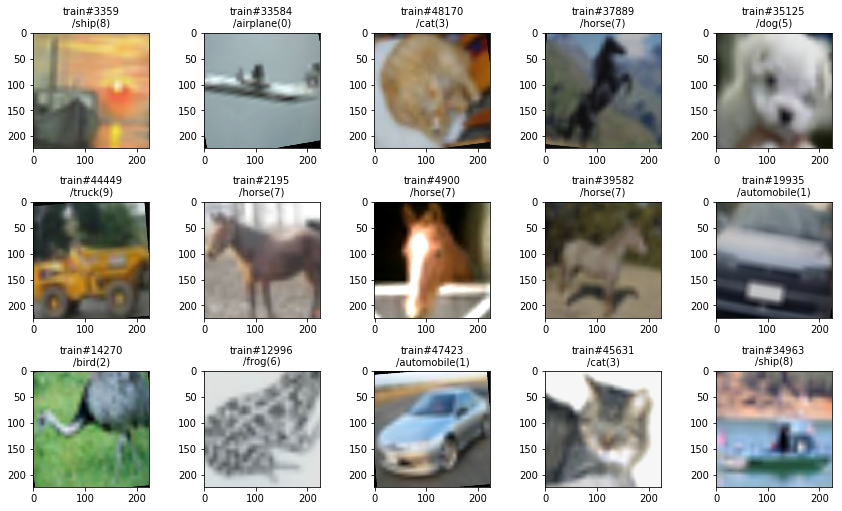

In [137]:
d= dset_train
idxes= np.random.permutation(len(d))[:15]
t0= time.time()
imgs= [d[i][0] for i in idxes]
print(f'Data proc time: {time.time()-t0}')
labels= [f'train#{i}\n/{d.classes[d[i][1]]}({d[i][1]})' for i in idxes]
PlotImgGrid(imgs, labels)

In [28]:
print('dset_train size:',len(dset_train))
print('dset_train[0] input type, shape:',type(dset_train[0][0]),dset_train[0][0].shape)
print('dset_train[0] label value:',dset_train[0][1],dset_train.classes[dset_train[0][1]])
print('dset_train[0][0] value range:',torch.min(dset_train[0][0]),torch.max(dset_train[0][0]))
print('dset_test size:',len(dset_test))
print('dset_test[0] input type, shape:',type(dset_test[0][0]),dset_test[0][0].shape)
print('dset_test[0] label value:',dset_test[0][1],dset_test.classes[dset_test[0][1]])

dset_train size: 50000
dset_train[0] input type, shape: <class 'torch.Tensor'> torch.Size([3, 224, 224])
dset_train[0] label value: 6 frog
dset_train[0][0] value range: tensor(0.) tensor(0.8745)
dset_test size: 10000
dset_test[0] input type, shape: <class 'torch.Tensor'> torch.Size([3, 224, 224])
dset_test[0] label value: 3 cat
